<a href="https://colab.research.google.com/github/admalerba/Mestrado/blob/main/CODIGO%20FONTE/Pilha_de_Estimadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [12]:
import pandas as pd
URL = 'https://raw.githubusercontent.com/admalerba/Mestrado/main/BASE%20DE%20DADOS/Students%20dropout%20and%20academic%20success.csv'
dropout = pd.read_csv(URL,sep=';')
dropout

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [13]:
dropout = dropout[dropout['Target']!='Enrolled']
dropout['Target'] = dropout['Target'].replace(to_replace=['Graduate', 'Dropout'], value=[0, 1]).astype(int)
dropout

<ipython-input-13-65146b133980>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropout['Target'] = dropout['Target'].replace(to_replace=['Graduate', 'Dropout'], value=[0, 1]).astype(int)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


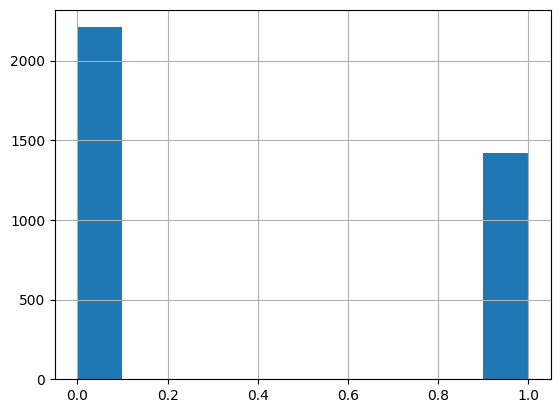

In [14]:
_ = dropout['Target'].hist()

In [15]:
X = dropout[dropout.columns[:-1]].values
y = dropout[dropout.columns[-1]].values
X.shape, y.shape

((3630, 36), (3630,))

# Estimadores Básicos

In [16]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.model_selection import cross_validate
from tqdm.notebook import tqdm
import warnings

warnings.filterwarnings('ignore')

tecnicas = [
  RidgeClassifier(random_state=42),
  LogisticRegression(random_state=42),
  DummyClassifier(random_state=42),
  LinearDiscriminantAnalysis(),
  QuadraticDiscriminantAnalysis(),
  AdaBoostClassifier(random_state=42),
  BaggingClassifier(random_state=42),
  ExtraTreesClassifier(random_state=42),
  GradientBoostingClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  HistGradientBoostingClassifier(random_state=42),
  GaussianProcessClassifier(random_state=42),
  BernoulliNB(),
  GaussianNB(),
  KNeighborsClassifier(),
  NearestCentroid(),
  MLPClassifier(random_state=42),
  LinearSVC(),
  NuSVC(),
  SVC(),
  DecisionTreeClassifier(random_state=42, max_depth=5),
  ExtraTreeClassifier(random_state=42, max_depth=15),
]

metricas = ['balanced_accuracy','precision_weighted','recall_weighted','f1_weighted']

r=[]
for t in tqdm(tecnicas):
  nome = t.__class__.__name__
  dn = {'nome':nome}
  try:
    resultados = cross_validate(t, X, y, scoring=metricas, n_jobs=-1)
    dn['fitTime'] = resultados['fit_time'].mean()
    for m in metricas:
      dn[m] = resultados['test_' + m].mean()
  except Exception as e:
    print(nome,str(e))
  r.append(dn)

warnings.filterwarnings('default')

df_res = pd.DataFrame(r)

  0%|          | 0/22 [00:00<?, ?it/s]

In [17]:
df_res.sort_values('balanced_accuracy',ascending=False)

,nome,fitTime,balanced_accuracy,precision_weighted,recall_weighted,f1_weighted
10,HistGradientBoostingClassifier,0.786627,0.899974,0.912262,0.911570,0.910816
8,GradientBoostingClassifier,1.137764,0.897188,0.911626,0.910468,0.909505
7,ExtraTreesClassifier,0.555045,0.894055,0.913390,0.910468,0.909069
9,RandomForestClassifier,1.325979,0.892062,0.909550,0.907438,0.906173
5,AdaBoostClassifier,0.378703,0.889097,0.903749,0.902755,0.901714
3,LinearDiscriminantAnalysis,0.033118,0.884952,0.908511,0.904132,0.902279
0,RidgeClassifier,0.008937,0.883896,0.907800,0.903306,0.901405
20,DecisionTreeClassifier,0.018604,0.876979,0.898100,0.895041,0.893230
6,BaggingClassifier,0.286936,0.876092,0.894021,0.892287,0.890799
4,QuadraticDiscriminantAnalysis,0.010141,0.857647,0.869834,0.869972,0.869091


# StackingClassifier

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
from sklearn.ensemble import StackingClassifier
import random
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')

listas = [
  RidgeClassifier(random_state=42),
  LogisticRegression(random_state=42),
  #DummyClassifier(random_state=42),
  LinearDiscriminantAnalysis(),
  QuadraticDiscriminantAnalysis(),
  #AdaBoostClassifier(random_state=42),
  #BaggingClassifier(random_state=42),
  ExtraTreesClassifier(random_state=42),
  #GradientBoostingClassifier(random_state=42),
  #RandomForestClassifier(random_state=42),
  #HistGradientBoostingClassifier(random_state=42),
  GaussianProcessClassifier(random_state=42),
  BernoulliNB(),
  GaussianNB(),
  KNeighborsClassifier(),
  #NearestCentroid(),
  MLPClassifier(random_state=42),
  LinearSVC(),
  NuSVC(),
  SVC(),
  DecisionTreeClassifier(random_state=42, max_depth=5),
  ExtraTreeClassifier(random_state=42, max_depth=15),
]

random.seed=42

def pegaItem():
  # sorteio do classificador do stacking
  return deepcopy(listas[random.randint(0,len(listas)-1)])

sc_res = []
for i in tqdm(range(20)):

  estimadores = []
  # quandidade de classificadores sorteados
  for j in range(random.randint(2,10)):
    estimadores.append((f'clf_{j}',pegaItem()))

  est_nomes = (','.join([y.__class__.__name__ for x, y in estimadores]))

  # sorteia o estimador de saída
  estimador_saida = pegaItem()

  sc = StackingClassifier(estimadores, estimador_saida, n_jobs=-1)

  dn = {
      'id':i,
      'estimadores': est_nomes,
      'saida': estimador_saida.__class__.__name__,
  }

  try:
    resultados = cross_validate(sc, X, y, scoring=metricas, n_jobs=-1)
    dn['fitTime'] = resultados['fit_time'].mean()
    for m in metricas:
      dn[m] = resultados['test_' + m].mean()
  except Exception as e:
    print(nome,str(e))
  sc_res.append(dn)

warnings.filterwarnings('default')

In [23]:
pd.DataFrame(sc_res).sort_values('balanced_accuracy',ascending=False)

,id,estimadores,saida,fitTime,balanced_accuracy,precision_weighted,recall_weighted,f1_weighted
2,2,"NuSVC,ExtraTreesClassifier,RidgeClassifier,NuS...",LinearSVC,13.256266,0.905235,0.918285,0.917355,0.916564
1,1,"MLPClassifier,ExtraTreeClassifier,ExtraTreesCl...",GaussianProcessClassifier,151.767427,0.891400,0.908392,0.906336,0.905098
0,0,"ExtraTreeClassifier,MLPClassifier",QuadraticDiscriminantAnalysis,4.805138,0.812058,0.835863,0.818457,0.816381


MLPClassifier,QuadraticDiscriminantAnalysis,KNeighborsClassifier,BernoulliNB,ExtraTreesClassifier,RidgeClassifier

LinearSVC

|fitTime|balanced_accuracy|precision_weighted|recall_weighted|f1_weighted|
|-------|-----------------|------------------|---------------|-----------|
|0.6899936738272779|0.905741699161243|0.9181526970309177|0.9173556503747164|0.916619040656812|

# VotingClassifier

In [ ]:
# não funcionou bem...
from sklearn.ensemble import VotingClassifier
import random
from copy import deepcopy
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

random.seed=42

listas = [
  RidgeClassifier(random_state=42),
  LogisticRegression(random_state=42),
  #DummyClassifier(random_state=42),
  LinearDiscriminantAnalysis(),
  QuadraticDiscriminantAnalysis(),
  #AdaBoostClassifier(random_state=42),
  #BaggingClassifier(random_state=42),
  ExtraTreesClassifier(random_state=42),
  #GradientBoostingClassifier(random_state=42),
  #RandomForestClassifier(random_state=42),
  #HistGradientBoostingClassifier(random_state=42),
  GaussianProcessClassifier(random_state=42),
  BernoulliNB(),
  #CategoricalNB(),
  #ComplementNB(),
  #MultinomialNB(),
  GaussianNB(),
  KNeighborsClassifier(),
  #RadiusNeighborsClassifier(),
  #NearestCentroid(),
  MLPClassifier(random_state=42),
  LinearSVC(),
  NuSVC(),
  SVC(),
  DecisionTreeClassifier(random_state=42, max_depth=5),
  ExtraTreeClassifier(random_state=42, max_depth=15),
]

def pegaItem():
  return deepcopy(listas[random.randint(0,len(listas)-1)])

vc_res = []
for i in tqdm(range(20)):

  estimadores = []
  for j in range(random.randint(2,7)):
    estimadores.append((f'clf_{j}',pegaItem()))
  est_nomes = ','.join([y.__class__.__name__ for x, y in estimadores])

  vc = VotingClassifier(estimadores,voting='hard')

  dn = {
      'id':i,
      'estimadores': est_nomes,
  }

  cv = GridSearchCV(vc,{},cv=4,scoring=metricas,refit=False)
  try:
    cv.fit(X,y)
  except Exception as e:
    vc_res.append(dn)
    print('ERRO:',est_nomes,str(e))
    continue

  dn['fitTime'] = cv.cv_results_['std_fit_time'][0]
  for m in metricas:
    dn[m] = cv.cv_results_['mean_test_' + m][0]

  vc_res.append(dn)

warnings.filterwarnings('default')

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
pd.DataFrame(vc_res).sort_values('balanced_accuracy',ascending=False)

NameError: ignored

# Proposta

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
from sklearn.ensemble import StackingClassifier
import random
from copy import deepcopy
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

random.seed=42

listas = [

  RidgeClassifier(alpha=0.5, random_state=42),
  RidgeClassifier(alpha=1.0, random_state=42),
  RidgeClassifier(alpha=2.0, random_state=42),
  RidgeClassifier(alpha=2.5, random_state=42),

  LogisticRegression(c=0.5, penalty='l1', random_state=42),
  LogisticRegression(c=1.0, penalty='l1', random_state=42),
  LogisticRegression(c=2.0, penalty='l1', random_state=42),
  LogisticRegression(c=2.5, penalty='l1', random_state=42),
  LogisticRegression(c=0.5, penalty='l2', random_state=42),
  LogisticRegression(c=1.0, penalty='l2', random_state=42),
  LogisticRegression(c=2.0, penalty='l2', random_state=42),
  LogisticRegression(c=2.5, penalty='l2', random_state=42),
  LogisticRegression(c=0.5, penalty='elasticnet', random_state=42),
  LogisticRegression(c=1.0, penalty='elasticnet', random_state=42),
  LogisticRegression(c=2.0, penalty='elasticnet', random_state=42),
  LogisticRegression(c=2.5, penalty=None, random_state=42),
  LogisticRegression(c=0.5, penalty=None, random_state=42),
  LogisticRegression(c=1.0, penalty=None, random_state=42),
  LogisticRegression(c=2.0, penalty=None, random_state=42),
  LogisticRegression(c=2.5, penalty=None, random_state=42),

  LinearDiscriminantAnalysis(),
  QuadraticDiscriminantAnalysis(),
  ExtraTreesClassifier(random_state=42),
  GaussianProcessClassifier(random_state=42),
  BernoulliNB(),
  GaussianNB(),
  KNeighborsClassifier(),
  MLPClassifier(random_state=42),
  LinearSVC(),
  NuSVC(),
  SVC(),
  DecisionTreeClassifier(random_state=42, max_depth=5),
  ExtraTreeClassifier(random_state=42, max_depth=15),
]



def pegaItem():
  return deepcopy(listas[])

sc_res = []
for i in tqdm(range(1000)):

  estimadores = []
  for j in range(random.randint(2,7)):
    estimadores.append((f'clf_{j}',pegaItem()))
  est_nomes = ','.join([y.__class__.__name__ for x, y in estimadores])

  estimador_saida = pegaItem()

  sc = StackingClassifier(estimadores,estimador_saida,cv=5)

  dn = {
      'id':i,
      'estimadores': est_nomes,
      'saida': estimador_saida.__class__.__name__,
  }

  cv = GridSearchCV(sc,{},cv=4,scoring=metricas,refit=False)
  try:
    cv.fit(X,y)
  except Exception as e:
    sc_res.append(dn)
    print('ERRO:',est_nomes,estimador_saida,str(e))
    continue

  dn['fitTime'] = cv.cv_results_['std_fit_time'][0]
  for m in metricas:
    dn[m] = cv.cv_results_['mean_test_' + m][0]

  sc_res.append(dn)

warnings.filterwarnings('default')

pd.DataFrame(sc_res)

SyntaxError: ignored

https://stackoverflow.com/questions/61711896/combine-gridsearchcv-and-stackingclassifier

In [ ]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
import random
from copy import deepcopy
from tqdm.notebook import tqdm
import warnings

classificadores = [
  RidgeClassifier(random_state=42),
  LogisticRegression(random_state=42),
]

parametros = [
    # alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, class_weight=None, solver='auto', positive=False, random_state=None
    {'alpha':[0.5,1.0,1.5,2.0,2.5],'tol':[0.01,0.001,0.0001,0.00001]},

    # penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None
    {'penalty':[None,'l1','l2','elasticnet'], 'tol':[0.01,0.001,0.0001,0.00001], 'c':[0.5,1.0,1.5,2.0,2.5], 'solver':['lbfgs','saga'],'max_iter':[100,500]},
]

metricas = ['balanced_accuracy','precision_weighted','recall_weighted','f1_weighted']

def sorteiaItem():
  return random.randint(0,len(classificadores)-1)

def pegaItem(id):
  return deepcopy(classificadores[id]), parametros[id]

sc_res = []

for i in tqdm(range(4)):

  # grupo de estimadores de entrada
  estimadores = []
  ajustes = {}
  for j in range(random.randint(2,7)):
    # sorteia o estimador e parametros de ajuste
    nome = f'clf{j}'
    id = sorteiaItem()
    est, param = pegaItem(id)
    # montando ajustes para o gridsearch
    for chave in param.keys():
      ajustes[f'{nome}__{chave}'] = param[chave]
    # inserindo na lista de estimadores de entrada
    estimadores.append((nome,est))

  est_nomes = ','.join([y.__class__.__name__ for x, y in estimadores])

  print('Estimadores:\n',estimadores)
  print('Ajustes:\n',ajustes)

  id = sorteiaItem()
  est, param = pegaItem(id)
  estimador_saida = est

  sc = StackingClassifier(estimadores,estimador_saida,cv=5)

  dn = {
      'id':i,
      'estimadores': est_nomes,
      'saida': estimador_saida.__class__.__name__,
  }

  print(ajustes)
  cv = GridSearchCV(sc,ajustes,cv=3,scoring=metricas,refit=False)
  try:
    cv.fit(X,y)
  except Exception as e:
    sc_res.append(dn)
    print('ERRO:',est_nomes,estimador_saida,str(e))
    continue

  dn['fitTime'] = cv.cv_results_['std_fit_time'][0]
  for m in metricas:
    dn[m] = cv.cv_results_['mean_test_' + m][0]

  sc_res.append(dn)

warnings.filterwarnings('default')

pd.DataFrame(sc_res)

  0%|          | 0/4 [00:00<?, ?it/s]

Estimadores:
 [('clf0', LogisticRegression(random_state=42)), ('clf1', RidgeClassifier(random_state=42)), ('clf2', RidgeClassifier(random_state=42)), ('clf3', LogisticRegression(random_state=42)), ('clf4', LogisticRegression(random_state=42)), ('clf5', LogisticRegression(random_state=42)), ('clf6', LogisticRegression(random_state=42))]
Ajustes:
 {'clf0__penalty': [None, 'l1', 'l2', 'elasticnet'], 'clf0__tol': [0.01, 0.001, 0.0001, 1e-05], 'clf0__c': [0.5, 1.0, 1.5, 2.0, 2.5], 'clf0__solver': ['lbfgs', 'saga'], 'clf0__max_iter': [100, 500], 'clf1__alpha': [0.5, 1.0, 1.5, 2.0, 2.5], 'clf1__tol': [0.01, 0.001, 0.0001, 1e-05], 'clf2__alpha': [0.5, 1.0, 1.5, 2.0, 2.5], 'clf2__tol': [0.01, 0.001, 0.0001, 1e-05], 'clf3__penalty': [None, 'l1', 'l2', 'elasticnet'], 'clf3__tol': [0.01, 0.001, 0.0001, 1e-05], 'clf3__c': [0.5, 1.0, 1.5, 2.0, 2.5], 'clf3__solver': ['lbfgs', 'saga'], 'clf3__max_iter': [100, 500], 'clf4__penalty': [None, 'l1', 'l2', 'elasticnet'], 'clf4__tol': [0.01, 0.001, 0.0001, 1

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


ERRO: LogisticRegression,LogisticRegression LogisticRegression(random_state=42) Invalid parameter 'c' for estimator LogisticRegression(random_state=42). Valid parameters are: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'].
Estimadores:
 [('clf0', RidgeClassifier(random_state=42)), ('clf1', RidgeClassifier(random_state=42)), ('clf2', RidgeClassifier(random_state=42)), ('clf3', RidgeClassifier(random_state=42)), ('clf4', LogisticRegression(random_state=42)), ('clf5', LogisticRegression(random_state=42))]
Ajustes:
 {'clf0__alpha': [0.5, 1.0, 1.5, 2.0, 2.5], 'clf0__tol': [0.01, 0.001, 0.0001, 1e-05], 'clf1__alpha': [0.5, 1.0, 1.5, 2.0, 2.5], 'clf1__tol': [0.01, 0.001, 0.0001, 1e-05], 'clf2__alpha': [0.5, 1.0, 1.5, 2.0, 2.5], 'clf2__tol': [0.01, 0.001, 0.0001, 1e-05], 'clf3__alpha': [0.5, 1.0, 1.5, 2.0, 2.5], 'clf3__tol': [0.01, 0.001, 0.0001, 1e-05], 'c

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [ ]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

import random
from copy import deepcopy
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

classificadores = [
  RidgeClassifier(random_state=42),
  LogisticRegression(random_state=42),
  DecisionTreeClassifier(random_state=42),

  LinearDiscriminantAnalysis(),
  QuadraticDiscriminantAnalysis(),
  ExtraTreesClassifier(random_state=42),
  GaussianProcessClassifier(random_state=42),
  BernoulliNB(),
  GaussianNB(),
  KNeighborsClassifier(),
  MLPClassifier(random_state=42),
  LinearSVC(),
  NuSVC(),
  SVC(),
  ExtraTreeClassifier(random_state=42, max_depth=15),


]

parametros = [
    {'alpha':sp_randFloat(0.5,2.0),'tol':sp_randFloat(0.0001,1.0)},
    {'penalty':[None,'l1','l2','elasticnet'], 'tol':sp_randFloat(0.0001,1.0), 'C':sp_randFloat(0.5,2.0), 'solver':['lbfgs','saga'],'max_iter':sp_randInt(100,500)},
    {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':sp_randInt(3,7), 'ccp_alpha':sp_randFloat()},

    {'solver':['svd', 'lsqr', 'igen'],'tol':[0.01,0.001,0.0001,0.00001]},
    {'store_covariance':['true','false']}
    {'criterion':['gini', 'entropy', 'log_loss']},
    {'multi_class':['one_vs_rest', 'one_vs_one']},
    {'fit_prior':['true','false'],'force_alpha':['true','false']},
    {},
    {},
    {},
    {},
    {},
    {},
    {},




  LinearDiscriminantAnalysis(),
  QuadraticDiscriminantAnalysis(),
  ExtraTreesClassifier(random_state=42),
  GaussianProcessClassifier(random_state=42),
  BernoulliNB(),
  GaussianNB(),
  KNeighborsClassifier(),
  MLPClassifier(random_state=42),
  LinearSVC(),
  NuSVC(),
  SVC(),
  DecisionTreeClassifier(random_state=42, max_depth=5),
  ExtraTreeClassifier(random_state=42, max_depth=15),

]

metricas = ['balanced_accuracy','precision_weighted','recall_weighted','f1_weighted']

def sorteiaItem():
  return random.randint(0,len(classificadores)-1)

def pegaItem(id):
  return deepcopy(classificadores[id]), parametros[id]

sc_res = []

for i in tqdm(range(6)):

  # grupo de estimadores de entrada
  estimadores = []
  ajustes = {}
  for j in range(random.randint(3,10)):
    # sorteia o estimador e parametros de ajuste
    nome = f'clf{j}'
    id = sorteiaItem()
    est, param = pegaItem(id)
    # montando ajustes para o gridsearch
    for chave in param.keys():
      ajustes[f'{nome}__{chave}'] = param[chave]
    # inserindo na lista de estimadores de entrada
    estimadores.append((nome,est))

  est_nomes = ','.join([y.__class__.__name__ for x, y in estimadores])

  id = sorteiaItem()
  est, param = pegaItem(id)
  estimador_saida = est

  sc = StackingClassifier(estimadores,estimador_saida,cv=5)

  dn = {
      'id':i,
      'estimadores': est_nomes,
      'saida': estimador_saida.__class__.__name__,
  }

  cv = RandomizedSearchCV(sc,ajustes,cv=2,
                          scoring=metricas,refit=metricas[-1],
                          n_iter=100,random_state=42)
  try:
    cv.fit(X,y)
  except Exception as e:
    sc_res.append(dn)
    print('ERRO:',est_nomes,estimador_saida,str(e))
    continue

  dn['fitTime'] = cv.cv_results_['std_fit_time'][0]
  for m in metricas:
    dn[m] = cv.cv_results_['mean_test_' + m][0]

  sc_res.append(dn)

warnings.filterwarnings('default')

pd.DataFrame(sc_res)

SyntaxError: ignored